In [35]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as mtick
plt.style.use('ggplot')
import seaborn as sns
pd.options.display.float_format = '{:,.0f}'.format
import dataframe_image as dfi
from scipy import stats
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
from sklearn.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(lm, n_features_to_select=5)
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

In [36]:
Ames = pd.read_csv('Ames_HousePrice.csv')

In [37]:
Ames.head() #1st 5 rows

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,905476230,1049,139500,120,RL,42,4235,Pave,NaN,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,911128020,1001,124900,30,C (all),60,6060,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,535377150,1039,114000,70,RL,80,8146,Pave,NaN,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70,8400,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [38]:
#drop extra unnamed column
Ames.drop('Unnamed: 0', axis=1, inplace=True)

In [39]:
Ames_Data_Types = pd.DataFrame({'Column': Ames.columns, 'Data Type': Ames.dtypes.values})
#Ames_Data_Types.to_csv('Ames_Data_Types.csv', index=False)  #Export, only needed once

In [40]:
#initial inspection
print('Column List\n', Ames.columns) #column list
print('\nStatistical Snapshot:\n', Ames.describe()) #statistical snapshot
print('\nColumns with Missing Values:\n', Ames.isnull().sum()[Ames.isnull().sum() != 0]) #sum of missing values by column name
print('\nRows with Missing Values:\n', Ames[Ames.isnull().any(axis=1)]) #show rows with missing values
print('\nDuplicate Rows:\n', Ames[Ames.duplicated(keep=False)]) #duplicate rows

Column List
 Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
     

In [41]:
Ames.drop_duplicates(keep = 'first', inplace=True)
print('\nDuplicate Rows:\n', Ames[Ames.duplicated(keep=False)]) #duplicate rows


Duplicate Rows:
 Empty DataFrame
Columns: [PID, GrLivArea, SalePrice, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition]
Index: []

[0 rows 

In [42]:
Ames_Missing_Values = (
    Ames.isnull().sum()[Ames.isnull().sum() != 0]
    .to_frame('MissingCount')
    .assign(MissingPercent=lambda x: 100 * x['MissingCount'] / len(Ames))
    .reset_index()
    .rename(columns={'index': 'ColumnName'})
)
Ames_Missing_Values
Ames_Missing_Columns = Ames_Missing_Values['ColumnName']

In [43]:
Ames_Missing_Columns = Ames[Ames_Missing_Values['ColumnName']]
Ames_Missing_Columns_Numeric = Ames_Missing_Columns.select_dtypes(include=['number'])
Ames_Missing_Columns_Categorical = Ames_Missing_Columns.select_dtypes(include=['object', 'category'])
for col in Ames_Missing_Columns_Categorical.columns:
    print(f'\nValue counts for {col}:')
    print(Ames_Missing_Columns_Categorical[col].value_counts(dropna=False))


Value counts for Alley:
Alley
NaN     2411
Grvl     105
Pave      63
Name: count, dtype: int64

Value counts for MasVnrType:
MasVnrType
NaN        1572
BrkFace     804
Stone       183
BrkCmn       20
Name: count, dtype: int64

Value counts for BsmtQual:
BsmtQual
TA     1166
Gd     1076
Ex      188
Fa       78
NaN      69
Po        2
Name: count, dtype: int64

Value counts for BsmtCond:
BsmtCond
TA     2315
Gd      101
Fa       88
NaN      69
Ex        3
Po        3
Name: count, dtype: int64

Value counts for BsmtExposure:
BsmtExposure
No     1708
Av      344
Gd      242
Mn      214
NaN      71
Name: count, dtype: int64

Value counts for BsmtFinType1:
BsmtFinType1
GLQ    753
Unf    706
ALQ    397
Rec    265
BLQ    250
LwQ    139
NaN     69
Name: count, dtype: int64

Value counts for BsmtFinType2:
BsmtFinType2
Unf    2179
Rec      97
LwQ      84
NaN      70
BLQ      64
ALQ      53
GLQ      32
Name: count, dtype: int64

Value counts for Electrical:
Electrical
SBrkr    2364
FuseA     168


In [44]:
Ames_Missing_Columns_Numeric.head()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
0,NaN,0,238,0,618,856,1,0,"1,939",2,399
1,42,149,552,393,104,"1,049",1,0,"1,984",1,266
2,60,0,737,0,100,837,0,0,"1,930",1,216
3,80,0,0,0,405,405,0,0,"1,940",1,281
4,70,0,643,0,167,810,1,0,"2,001",2,528


In [45]:
#Pivot Tables for Round 1 Imputations
Zoning_Shape_Pivot = Ames.pivot_table(index=['MSZoning', 'LotShape'], aggfunc={'LotFrontage': 'mean', 'LotArea': 'mean'})
OverallQual_Cond_Pivot = Ames.pivot_table(index=['OverallQual', 'OverallCond'],
    aggfunc={
        'Electrical': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,
        'MasVnrType': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan})
Zoning_Shape_Pivot.rename(columns={'LotFrontage': 'LotFrontage_Mean', 'LotArea': 'LotArea_Mean'}, inplace=True)
OverallQual_Cond_Pivot.rename(columns={'Electrical': 'Electrical_Mode', 'MasVnrType': 'MasVnrType_Mode'}, inplace=True)

In [46]:
# Impute LotFrontage proportional to LotArea
missingRowIndexes = Ames['LotFrontage'].isnull()
Ames.loc[missingRowIndexes, 'LotFrontage'] = Ames.loc[missingRowIndexes].apply(
    lambda row: (
        Zoning_Shape_Pivot.loc[(row['MSZoning'], row['LotShape']), 'LotFrontage_Mean'] 
        / Zoning_Shape_Pivot.loc[(row['MSZoning'], row['LotShape']), 'LotArea_Mean'] 
        * row['LotArea']
        if ((row['MSZoning'], row['LotShape']) in Zoning_Shape_Pivot.index 
            and pd.notna(Zoning_Shape_Pivot.loc[(row['MSZoning'], row['LotShape']), 'LotFrontage_Mean']))
        else Ames['LotFrontage'].dropna().mean() / Ames['LotArea'].dropna().mean() * row['LotArea']
    ),
    axis=1
)

In [47]:
#Impute Electrical
missingRowIndexes = Ames['Electrical'].isnull()
Ames.loc[missingRowIndexes, 'Electrical'] = Ames.loc[missingRowIndexes].apply(
    lambda row: (
        OverallQual_Cond_Pivot.loc[(row['OverallQual'], row['OverallCond']), 'Electrical_Mode']
        if (row['OverallQual'], row['OverallCond']) in OverallQual_Cond_Pivot.index
        else Ames['Electrical'].dropna().mode().iloc[0]
    ),
    axis=1
)

In [48]:
#Impute Alley, BsmtCond, BsmtExposure, BsmtFinSF1, BsmtFinSF2, BsmtFinType1, BsmtQual, BsmtUnfSF, Fence, FireplaceQu, GarageType, MasVnrArea, MiscFeature, PoolQC, TotalBsmtSF
Ames['BsmtFinSF1'].fillna(0, inplace=True)
Ames['BsmtFinSF2'].fillna(0, inplace=True)
Ames['BsmtUnfSF'].fillna(0, inplace=True)
Ames['TotalBsmtSF'].fillna(0, inplace=True)
Ames['Alley'].fillna('No Alley Access', inplace=True)
Ames['BsmtCond'].fillna('No Basement', inplace=True)
Ames['BsmtExposure'].fillna('No Basement', inplace=True)
Ames['BsmtFinType1'].fillna('No Basement', inplace=True)
Ames['BsmtQual'].fillna('No Basement', inplace=True)
Ames['Fence'].fillna('No Fence', inplace=True)
Ames['FireplaceQu'].fillna('No Fireplace', inplace=True)
Ames['GarageType'].fillna('No Garage', inplace=True)
Ames['MiscFeature'].fillna('No Misc Feature', inplace=True)
Ames['PoolQC'].fillna('No Pool', inplace=True)
Ames['MasVnrArea'].fillna(0, inplace=True)
Ames['MasVnrArea'].replace({1: 0}, inplace=True)  #assuming 1's are errors

C:\Users\edjwe\AppData\Local\Temp\ipykernel_23952\225346312.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Ames['BsmtFinSF1'].fillna(0, inplace=True)
C:\Users\edjwe\AppData\Local\Temp\ipykernel_23952\225346312.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [49]:
#Impute MasVnrType
# Fill 'MasVnrType' as 'No Veneer' where MasVnrArea <= 0
Ames.loc[Ames['MasVnrType'].isnull() & (Ames['MasVnrArea'] <= 0), 'MasVnrType'] = 'No Veneer'
# Impute remaining missing MasVnrType using pivot or overall mode
missingRowIndexes = Ames['MasVnrType'].isnull()
Ames.loc[missingRowIndexes, 'MasVnrType'] = Ames.loc[missingRowIndexes].apply(
    lambda row: (
        OverallQual_Cond_Pivot.loc[(row['OverallQual'], row['OverallCond']), 'MasVnrType_Mode']
        if (row['OverallQual'], row['OverallCond']) in OverallQual_Cond_Pivot.index
        else Ames['MasVnrType'].dropna().mode().iloc[0]
    ),
    axis=1
)

In [50]:
#Pivot Table for Round 2 Imputations
OverallQual_Cond_GarageType_Pivot = Ames.pivot_table(index=['OverallQual', 'OverallCond', 'GarageType'],
    aggfunc={
        'GarageYrBlt': 'mean',
        'GarageFinish': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,
        'GarageQual': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,
        'GarageCond': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan})
OverallQual_Cond_GarageType_Pivot.rename(columns={'GarageYrBlt': 'GarageYrBlt_Mean', 'GarageFinish': 'GarageFinish_Mode', 'GarageQual': 'GarageQual_Mode', 'GarageCond': 'GarageCond_Mode'}, inplace=True)

In [51]:
#Impute GarageYrBlt, GarageFinish, GarageQual, GarageCond
garage_cols = ['GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in garage_cols:
    Ames.loc[Ames['GarageType'].isnull() & Ames[col].isnull(), col] = 'No Garage'
missing_rows = Ames['GarageYrBlt'].isnull()
Ames.loc[missing_rows, 'GarageYrBlt'] = Ames.loc[missing_rows].apply(
    lambda row: (
        OverallQual_Cond_GarageType_Pivot.loc[(row['OverallQual'], row['OverallCond'], row['GarageType']), 'GarageYrBlt_Mean']
        if (row['OverallQual'], row['OverallCond'], row['GarageType']) in OverallQual_Cond_GarageType_Pivot.index
        else Ames['GarageYrBlt'].dropna().mean()
    ),
    axis=1
)
missing_rows = Ames['GarageFinish'].isnull()
Ames.loc[missing_rows, 'GarageFinish'] = Ames.loc[missing_rows].apply(
    lambda row: (
        OverallQual_Cond_GarageType_Pivot.loc[(row['OverallQual'], row['OverallCond'], row['GarageType']), 'GarageFinish_Mode']
        if (row['OverallQual'], row['OverallCond'], row['GarageType']) in OverallQual_Cond_GarageType_Pivot.index
        else Ames['GarageFinish'].dropna().mode().iloc[0]
    ),
    axis=1
)
missing_rows = Ames['GarageQual'].isnull()
Ames.loc[missing_rows, 'GarageQual'] = Ames.loc[missing_rows].apply(
    lambda row: (
        OverallQual_Cond_GarageType_Pivot.loc[(row['OverallQual'], row['OverallCond'], row['GarageType']), 'GarageQual_Mode']
        if (row['OverallQual'], row['OverallCond'], row['GarageType']) in OverallQual_Cond_GarageType_Pivot.index
        else Ames['GarageQual'].dropna().mode().iloc[0]
    ),
    axis=1
)
missing_rows = Ames['GarageCond'].isnull()
Ames.loc[missing_rows, 'GarageCond'] = Ames.loc[missing_rows].apply(
    lambda row: (
        OverallQual_Cond_GarageType_Pivot.loc[(row['OverallQual'], row['OverallCond'], row['GarageType']), 'GarageCond_Mode']
        if (row['OverallQual'], row['OverallCond'], row['GarageType']) in OverallQual_Cond_GarageType_Pivot.index
        else Ames['GarageCond'].dropna().mode().iloc[0]
    ),
    axis=1
)

C:\Users\edjwe\AppData\Local\Temp\ipykernel_23952\1173850558.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No Garage' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  Ames.loc[Ames['GarageType'].isnull() & Ames[col].isnull(), col] = 'No Garage'


In [52]:
Ames.loc[Ames['BsmtFinType1'].isnull() & Ames['BsmtFinType2'].isnull(), 'BsmtFinType2'] = 'No Basement'
Ames['BsmtFinType2'].fillna(Ames['BsmtFinType2'].dropna().mode().iloc[0], inplace=True)

C:\Users\edjwe\AppData\Local\Temp\ipykernel_23952\3712317149.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Ames['BsmtFinType2'].fillna(Ames['BsmtFinType2'].dropna().mode().iloc[0], inplace=True)


In [53]:
#Pivot Tables for Round 3 Imputations
Garage_Qual_Cond_Type_Pivot = Ames.pivot_table(index=['GarageQual', 'GarageCond', 'GarageType'],
    aggfunc={
        'GarageArea': 'mean',
        'GarageCars': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan})
Basement_Qual_FinType1_FinType2_Pivot = Ames.pivot_table(index=['BsmtQual', 'BsmtFinType1', 'BsmtFinType2'],
    aggfunc={
        'BsmtFullBath': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,
        'BsmtHalfBath': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan})
Garage_Qual_Cond_Type_Pivot.rename(columns={'GarageArea': 'GarageArea_Mean', 'GarageCars': 'GarageCars_Mode'}, inplace=True)
Basement_Qual_FinType1_FinType2_Pivot.rename(columns={'BsmtFullBath': 'BsmtFullBath_Mode', 'BsmtHalfBath': 'BsmtHalfBath_Mode'}, inplace=True)

In [54]:
# Impute GarageArea and GarageCars
missing_rows = Ames['GarageArea'].isnull()
Ames.loc[missing_rows, 'GarageArea'] = Ames.loc[missing_rows].apply(
    lambda row: (
        Garage_Qual_Cond_Type_Pivot.loc[(row['GarageQual'], row['GarageCond'], row['GarageType']), 'GarageArea_Mean']
        if (row['GarageQual'], row['GarageCond'], row['GarageType']) in Garage_Qual_Cond_Type_Pivot.index
        else Ames['GarageArea'].dropna().mean()
    ),
    axis=1
)

missing_rows = Ames['GarageCars'].isnull()
Ames.loc[missing_rows, 'GarageCars'] = Ames.loc[missing_rows].apply(
    lambda row: (
        Garage_Qual_Cond_Type_Pivot.loc[(row['GarageQual'], row['GarageCond'], row['GarageType']), 'GarageCars_Mode']
        if (row['GarageQual'], row['GarageCond'], row['GarageType']) in Garage_Qual_Cond_Type_Pivot.index
        else Ames['GarageCars'].dropna().mode().iloc[0]
    ),
    axis=1
)

# Impute BsmtFullBath and BsmtHalfBath
missing_rows = Ames['BsmtFullBath'].isnull()
Ames.loc[missing_rows, 'BsmtFullBath'] = Ames.loc[missing_rows].apply(
    lambda row: (
        Basement_Qual_FinType1_FinType2_Pivot.loc[(row['BsmtQual'], row['BsmtFinType1'], row['BsmtFinType2']), 'BsmtFullBath_Mode']
        if (row['BsmtQual'], row['BsmtFinType1'], row['BsmtFinType2']) in Basement_Qual_FinType1_FinType2_Pivot.index
        else Ames['BsmtFullBath'].dropna().mode().iloc[0]
    ),
    axis=1
)

missing_rows = Ames['BsmtHalfBath'].isnull()
Ames.loc[missing_rows, 'BsmtHalfBath'] = Ames.loc[missing_rows].apply(
    lambda row: (
        Basement_Qual_FinType1_FinType2_Pivot.loc[(row['BsmtQual'], row['BsmtFinType1'], row['BsmtFinType2']), 'BsmtHalfBath_Mode']
        if (row['BsmtQual'], row['BsmtFinType1'], row['BsmtFinType2']) in Basement_Qual_FinType1_FinType2_Pivot.index
        else Ames['BsmtHalfBath'].dropna().mode().iloc[0]
    ),
    axis=1
)

In [55]:
print('\nColumns with Missing Values:\n', Ames.isnull().sum()[Ames.isnull().sum() != 0]) #sum of missing values by column name
print('\nRows with Missing Values:\n', Ames[Ames.isnull().any(axis=1)]) #show rows with missing values


Columns with Missing Values:
 Series([], dtype: int64)

Rows with Missing Values:
 Empty DataFrame
Columns: [PID, GrLivArea, SalePrice, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, Mis

In [56]:
Ames_Columns_Numeric = Ames[[
    '1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath',
    'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr',
    'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF',
    'PoolArea', 'ScreenPorch', 'TotalBsmtSF', 'TotRmsAbvGrd', 'WoodDeckSF',
    'YearBuilt', 'YearRemodAdd', 'YrSold']
    ]

In [57]:
#Custom Histogram KDE Function
def custom_kde(frame_name, col_name):
    
    sns.set_style('whitegrid')      # Style setup

    # Calculate Mean, Median, Mode for SalePrice
    mean_col = frame_name[col_name].mean()
    median_col = frame_name[col_name].median()
    mode_col = frame_name[col_name].mode().values[0]
     
    # Plotting histogram
    plt.figure(figsize=(14, 7))
    sns.histplot(x=frame_name[col_name], bins=100, kde=True, color='skyblue')
    plt.axvline(mean_col, color='r', linestyle='--', label=f'Mean: {mean_col:,.0f}')
    plt.axvline(median_col, color='g', linestyle='-', label=f'Median: {median_col:,.0f}')
    plt.axvline(mode_col, color='b', linestyle='-.', label=f'Mode: {mode_col:,.0f}')
     
    # Annotations for skewness and kurtosis
    plt.annotate('Skewness: {:.2f}\nKurtosis: {:.2f}'.format(frame_name[col_name].skew(), frame_name[col_name].kurt()),
                 xy=(500000, 100), fontsize=14, bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='aliceblue'))
     
    plt.title(col_name)
    plt.legend()
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
    plt.show()

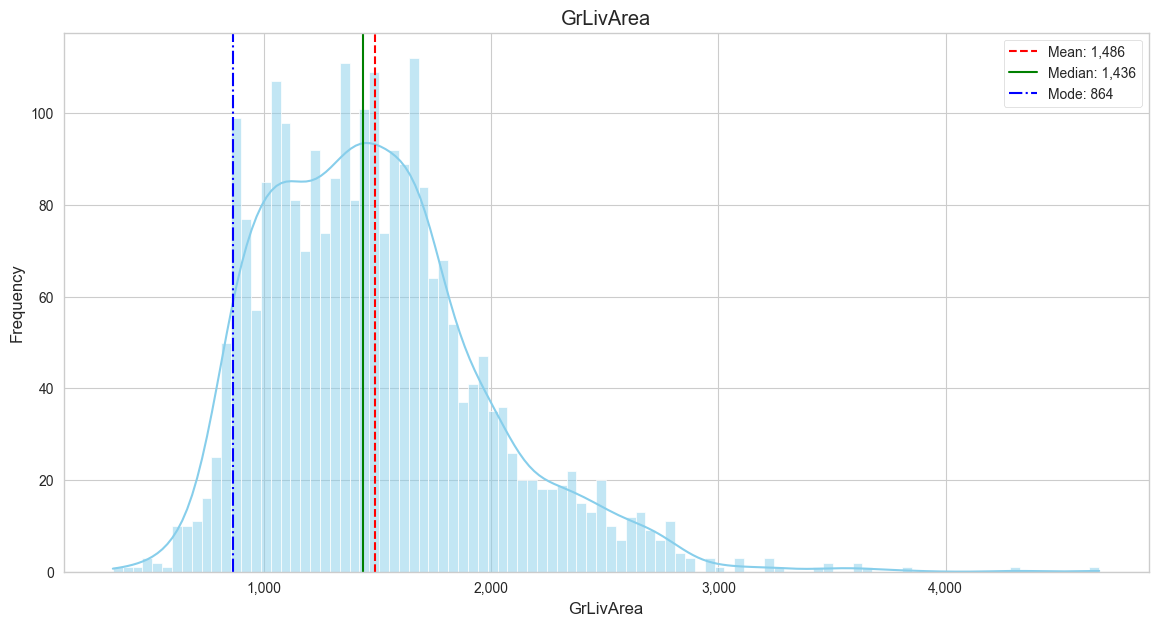

In [58]:
custom_kde(Ames, 'GrLivArea')

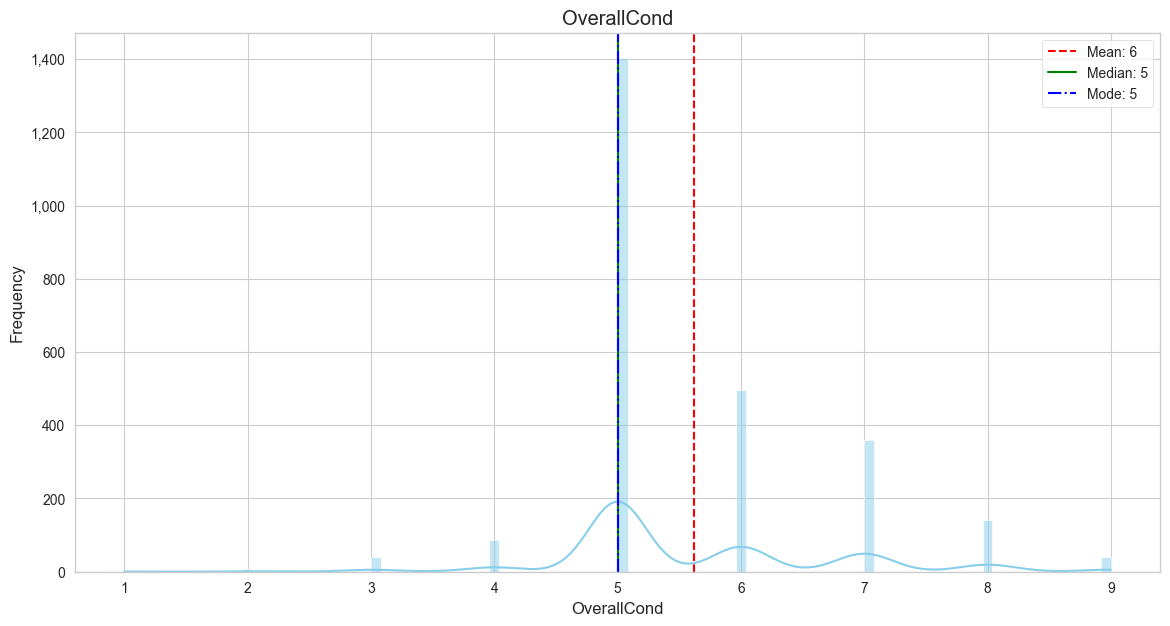

In [59]:
custom_kde(Ames, 'OverallCond')

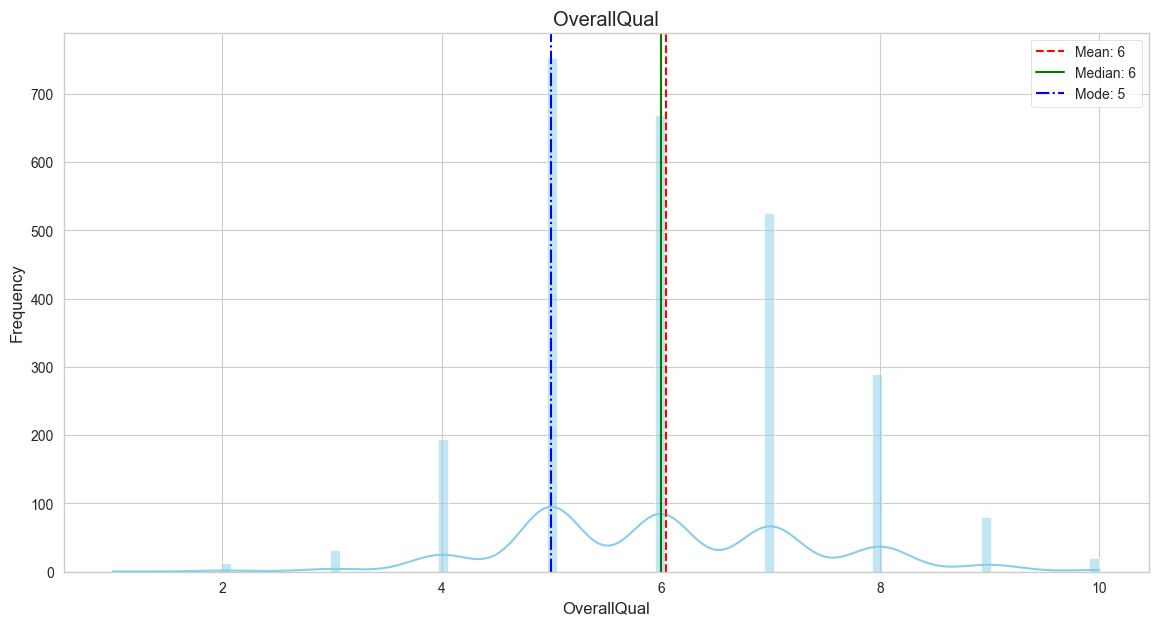

In [60]:
custom_kde(Ames, 'OverallQual')

Text(0, 0.5, 'Price')

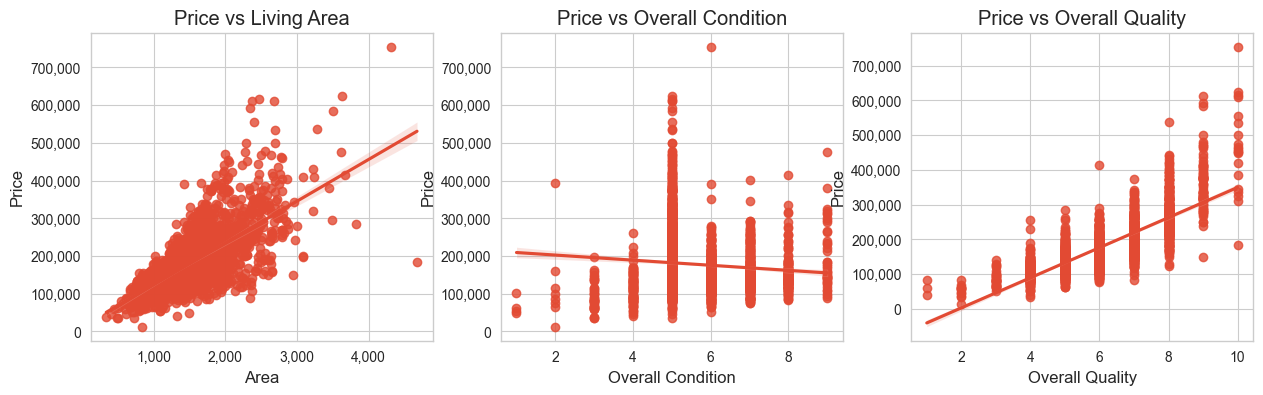

In [61]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

scat1 = sns.regplot(x='GrLivArea', y='SalePrice', data=Ames, ax=ax[0])
scat1.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
scat1.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax[0].set_title('Price vs Living Area')
ax[0].set_xlabel('Area')
ax[0].set_ylabel('Price')
 
scat2 = sns.regplot(x='OverallCond', y='SalePrice', data=Ames, ax=ax[1])
scat2.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
scat2.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax[1].set_title('Price vs Overall Condition')
ax[1].set_xlabel('Overall Condition')
ax[1].set_ylabel('Price')

scat3 = sns.regplot(x='OverallQual', y='SalePrice', data=Ames, ax=ax[2])
scat3.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
scat3.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax[2].set_title('Price vs Overall Quality')
ax[2].set_xlabel('Overall Quality')
ax[2].set_ylabel('Price')

In [62]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=2)

In [63]:
Y = Ames['SalePrice']
X = Ames[['GrLivArea']]

lm.fit(X, Y)
r2 = cross_val_score(lm, X, Y, cv=kf, scoring='r2')
print(f"R² per fold: {', '.join(f'{r:.4f}' for r in r2)}")
print(f"Average R²: {r2.mean():.4f}")
print(f"Intercept: {lm.intercept_:.2f}")
print(f"Coefficient: {lm.coef_[0]:.4f}")

R² per fold: 0.5219, 0.5352, 0.4719, 0.5277, 0.5254
Average R²: 0.5164
Intercept: 13774.12
Coefficient: 110.5551


In [64]:
X = Ames[['GrLivArea', 'OverallQual', 'OverallCond']]
lm.fit(X, Y)
r2 = cross_val_score(lm, X, Y, cv=kf, scoring='r2')
print(f"R² per fold: {', '.join(f'{r:.4f}' for r in r2)}")
print(f"Average R²: {r2.mean():.4f}")
print(f"Intercept: {lm.intercept_:.2f}")
print(f"Coefficient: {lm.coef_[0]:.4f}")

R² per fold: 0.7138, 0.7342, 0.7109, 0.7391, 0.7771
Average R²: 0.7350
Intercept: -99560.28
Coefficient: 61.9534


In [65]:
X = Ames[['GrLivArea', 'OverallQual']]
lm.fit(X, Y)
r2 = cross_val_score(lm, X, Y, cv=kf, scoring='r2')
print(f"R² per fold: {', '.join(f'{r:.4f}' for r in r2)}")
print(f"Average R²: {r2.mean():.4f}")
print(f"Intercept: {lm.intercept_:.2f}")
print(f"Coefficient: {lm.coef_[0]:.4f}")

R² per fold: 0.7139, 0.7351, 0.7109, 0.7391, 0.7772
Average R²: 0.7352
Intercept: -101360.73
Coefficient: 62.0045


In [66]:
#Sequential Feature Selector
X = Ames_Columns_Numeric
feature_scores = {}

# Evaluate each feature with cross-validation
for feature in X.columns:
    X_single = X[[feature]]
    cv_scores = cross_val_score(lm, X_single, Y)
    feature_scores[feature] = cv_scores.mean()
 
# Identify the top 5 features based on mean CV R² scores
sorted_features = sorted(feature_scores.items(), key=lambda item: item[1], reverse=True)
top_5 = sorted_features[0:5]
 
# Display the top 5 features and their individual performance
for feature, score in top_5:
    print(f"Feature: {feature}, Mean CV R²: {score:.4f}")

Feature: GrLivArea, Mean CV R²: 0.5127
Feature: TotalBsmtSF, Mean CV R²: 0.4064
Feature: GarageCars, Mean CV R²: 0.3970
Feature: 1stFlrSF, Mean CV R²: 0.3957
Feature: GarageArea, Mean CV R²: 0.3939


In [67]:
# Extracting the top 5 features for our multiple linear regression
top_features = [feature for feature, score in top_5]
 
# Building the model with the top 5 features
X_top = Ames[top_features]
 
# Evaluating the model with cross-validation
cv_scores_mlr = cross_val_score(lm, X_top, Y, cv=5, scoring="r2")
mean_mlr_score = cv_scores_mlr.mean()
 
print(f"Mean CV R² Score for Multiple Linear Regression Model: {mean_mlr_score:.4f}")

Mean CV R² Score for Multiple Linear Regression Model: 0.7177


In [68]:
sfs.fit(X, Y)
selected_features = X.columns[sfs.get_support()].to_list()
print(f"Features selected by SFS: {selected_features}")
 
scores = cross_val_score(lm, Ames[selected_features], Y)
print(f"Mean CV R² Score using SFS with n=5: {scores.mean():.4f}")

Features selected by SFS: ['BedroomAbvGr', 'BsmtFinSF1', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt']
Mean CV R² Score using SFS with n=5: 0.7842


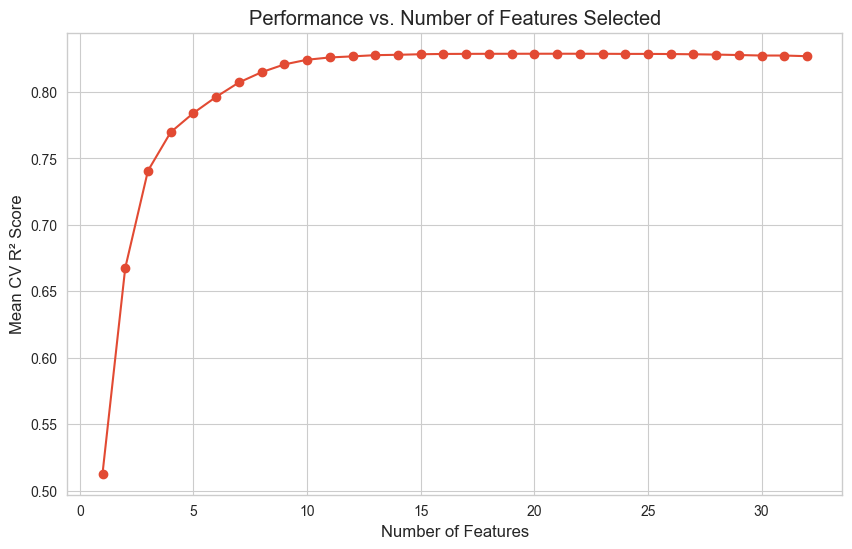

In [69]:
# Prepare to store the mean CV R² scores for each number of features
mean_scores = []
 
# Iterate over a range from 1 feature to the maximum number of features available
for n_features_to_select in range(1, len(X.columns)):
    sfs = SequentialFeatureSelector(lm, n_features_to_select=n_features_to_select)
    sfs.fit(X, Y)
    selected_features = X.columns[sfs.get_support()]
    score = cross_val_score(lm, X[selected_features], Y, cv=5, scoring="r2").mean()
    mean_scores.append(score)
 
# Plot the mean CV R² scores against the number of features selected
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(X.columns)), mean_scores, marker="o")
plt.title("Performance vs. Number of Features Selected")
plt.xlabel("Number of Features")
plt.ylabel("Mean CV R² Score")
plt.grid(True)
plt.show()

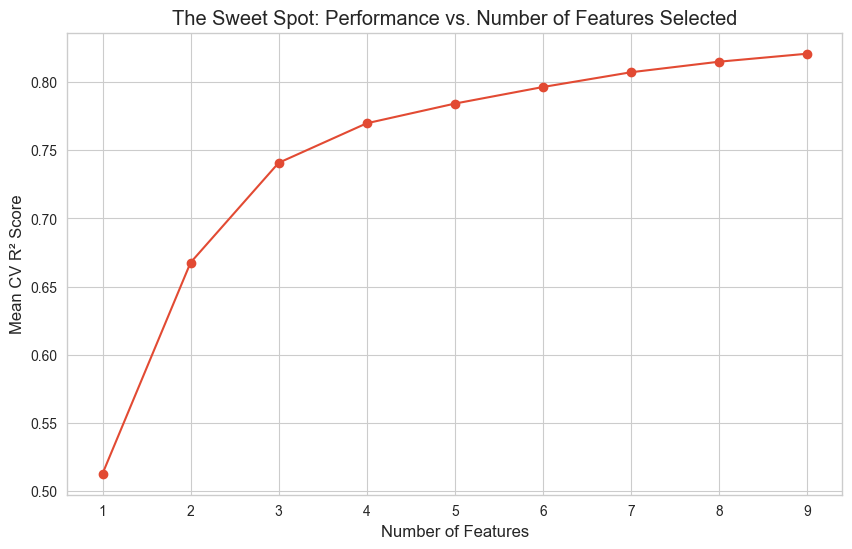

In [70]:
# Apply Sequential Feature Selector with tolerance = 0.005, building on code above
sfs_tol = SequentialFeatureSelector(lm, n_features_to_select="auto", tol=0.005)
sfs_tol.fit(X, Y)
 
# Get the number of features selected with tolerance
n_features_selected = sum(sfs_tol.get_support())
 
# Prepare to store the mean CV R² scores for each number of features
mean_scores_tol = []
 
# Iterate over a range from 1 feature to the Sweet Spot
for n_features_to_select in range(1, n_features_selected + 1):
    sfs = SequentialFeatureSelector(lm, n_features_to_select=n_features_to_select)
    sfs.fit(X, Y)
    selected_features = X.columns[sfs.get_support()]
    score = cross_val_score(lm, X[selected_features], Y, cv=5, scoring="r2").mean()
    mean_scores_tol.append(score)
 
# Plot the mean CV R² scores against the number of features selected
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_features_selected + 1), mean_scores_tol, marker="o")
plt.title("The Sweet Spot: Performance vs. Number of Features Selected")
plt.xlabel("Number of Features")
plt.ylabel("Mean CV R² Score")
plt.grid(True)
plt.show()

In [71]:
# Print the selected features and their performance, building on the above: 
selected_features = X.columns[sfs_tol.get_support()]
print(f"Number of features selected: {n_features_selected}")
print(f"Selected features: {selected_features.tolist()}")
print(f"Mean CV R² Score using SFS with tol=0.005: {mean_scores_tol[-1]:.4f}")

Number of features selected: 9
Selected features: ['BedroomAbvGr', 'BsmtFinSF1', 'GarageArea', 'GrLivArea', 'KitchenAbvGr', 'MasVnrArea', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']
Mean CV R² Score using SFS with tol=0.005: 0.8208
